## Modelling and Evaluation Notebook

### Objective:

* Write here your notebook objective, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"
 - Satisfy business requirement 2:
 - The client is interested in predicting if a cherry leaf is healthy or contains powdery mildew.

### Inputs

* Write here which data or information you need to run the notebook
- inputs/cherry-leaves_dataset/cherry-leaves/test
- inputs/cherry-leaves_dataset/cherry-leaves/train
- inputs/cherry-leaves_dataset/cherry-leaves/validation 

### Outputs

* Write here which files, code or artefacts you generate by the end of the notebook
- Distribution plot of images in test, train and validatio sets
- Image augmentation
- Class indices to change prediction inferance in lables
- ML model creation and training
- Save trained model
- Learning curve plot for model performance
- Evaluate Model pickle file
- Random image file prediction 

## Additional Comments
### Comments/Insights/Conclusions

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Import packages

In [31]:
! pip install -r /workspaces/mildew-detection-in-cherry-leaves/requirements.txt

ine 2)) (4.17.3)
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30682 sha256=8a0159f6639a487edb2e90ac017239d0cc8fd5cb8f3f8d4675c9ed73effcca65
  Stored in directory: /home/codeany/.cache/pip/wheels/f1/60/77/22b9b5887bd47801796a856f47650d9789c74dc3161a26d608
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73031 sha256=568eae2ac37000a3899d4a254be350c753288bbc7be19b52ffc897cab62712d0
  Stored in directory: /home/codeany/.cache/pip/wheels/29/da/11/144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4832 sha256=f2728d5bebd6025e02e03fff039db5b62e1fea1cac5c6650ebfce06430c6221f
  Stored in directory: /home/codeany/.cache/pip/wheels/a0/16/9c/5473df82468f958445479c59e784896fa24f4a5fc024b0f501
  Created wheel for wrapt: filename=wrapt-1.12.1-cp38-cp38-linux_x86_64.whl size=75896 sha256=946fc8cfecfa4a8b3365f6af20abdd37cc028d73f22272c1c3cf52c8b242ffaf
  Stored in directory: /hom

In [32]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

## Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

* We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/mildew-detection-in-cherry-leaves/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [4]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [5]:
current_dir = os.getcwd()
current_dir

'/workspaces/mildew-detection-in-cherry-leaves'

# Set Input Directories

### Set test, train, validation paths:Section 1 content

In [6]:
my_data_dir = 'inputs/cherry-leaves_dataset/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

---

# Set output directories

In [7]:
version = 'v1' 
file_path =f'outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'): 
    print('Existing version already available create a new version')
    pass 
else: 
    os.makedirs(name=file_path)

Existing version already available create a new version


Set label names:

In [8]:
labels = os.listdir(train_path)
print('Label for the images is', labels)

Label for the images is ['healthy', 'powdery_mildew']


---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

### Set image shape

In [33]:
## Import saved image shape embedding
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(256, 256, 3)

## Identify Number of Images in test, train and validation data

In [34]:
df_freq = pd.DataFrame([]) 
for folder in ['train', 'validation', 'test']:
  for label in labels:
    df_freq = df_freq.append(
        pd.Series(data={'Set': folder,
                        'Label': label,
                        'Frequency':int(len(os.listdir(my_data_dir+'/'+ folder + '/' + label)))}
                  ),
                  ignore_index=True
        )
    
    print(f"* {folder} - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images")

print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png', bbox_inches='tight', dpi=150)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'append'

# Image data augmentation

Because our dataset only shows a limited number of images, we need to augment the images to increase the learning capacity of the ML model. 

Import ImageDataGenerator form Tensorflow

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Here we initialize the ImageDataGenerator

In [36]:
augmented_image_data = ImageDataGenerator(rotation_range=15,
                                   width_shift_range=0.12, 
                                   height_shift_range=0.10,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest',
                                   rescale=1./255
                              )

### Augment training image dataset

In [37]:
batch_size = 20 # Set batch size
train_set = augmented_image_data.flow_from_directory(train_path,
                                              target_size=image_shape[:2],
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='binary',
                                              shuffle=True
                                              )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Augment validation image dataset

In [38]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                          target_size=image_shape[:2],
                                                          color_mode='rgb',
                                                          batch_size=batch_size,
                                                          class_mode='binary',
                                                          shuffle=False
                                                          )

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

## Augment test image dataset

In [39]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                    target_size=image_shape[:2],
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    shuffle=False
                                                    )

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

## Plot augmented training images

(20, 256, 256, 3)


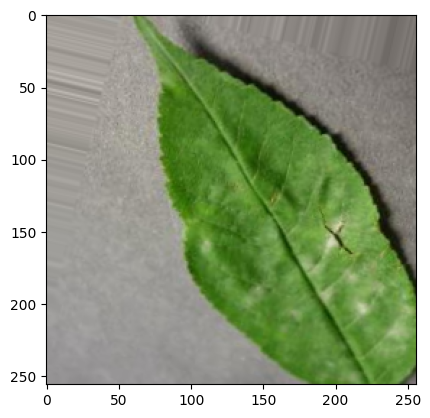

(20, 256, 256, 3)


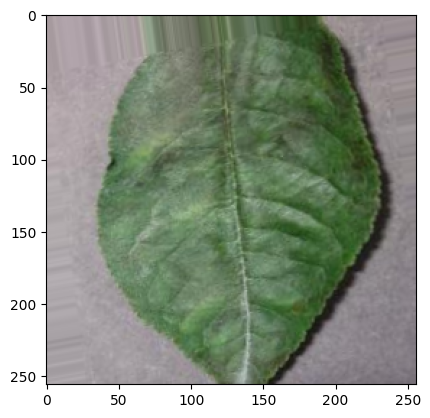

(20, 256, 256, 3)


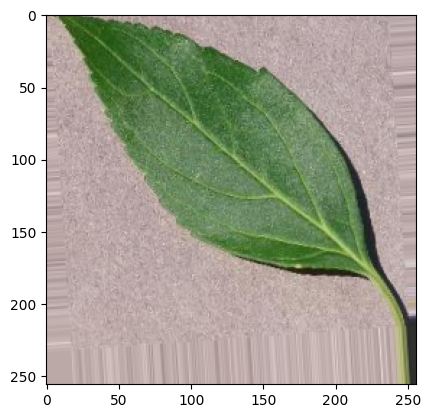

In [16]:
for _ in range(3):
    img, label = train_set.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

# Plot augmented validation images

(20, 256, 256, 3)


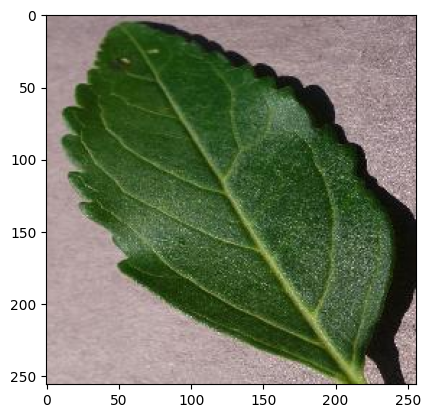

(20, 256, 256, 3)


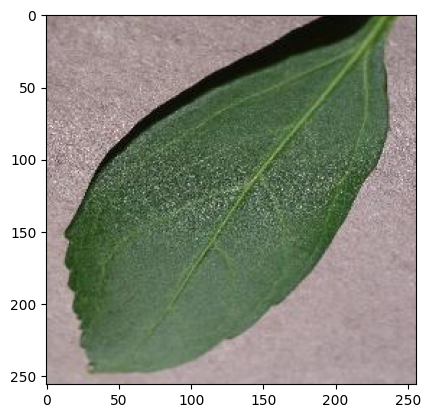

(20, 256, 256, 3)


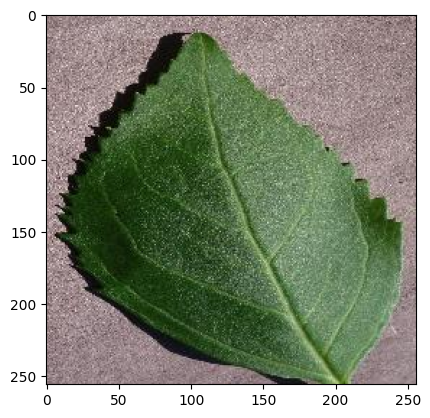

In [40]:
for _ in range(3):
    img, label = validation_set.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

# Plot augmented test images

(20, 256, 256, 3)


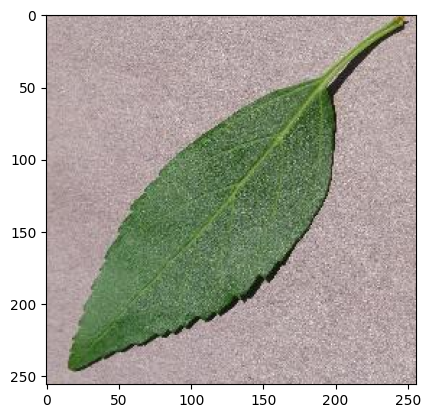

(20, 256, 256, 3)


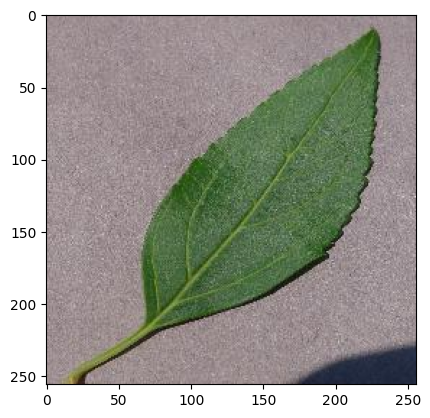

(20, 256, 256, 3)


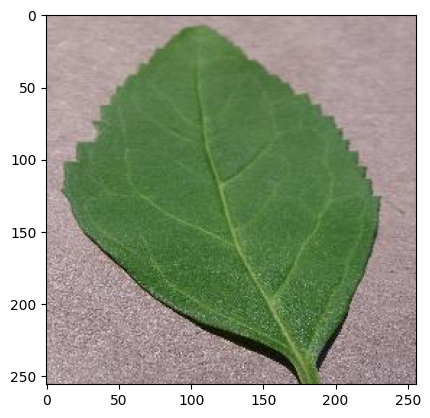

In [41]:
for _ in range(3):
    img, label = test_set.next()
    print(img.shape)   
    plt.imshow(img[0])
    plt.show()

## Save class indices

In [42]:
joblib.dump(value=train_set.class_indices ,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

## Create the ML Model

- Import the required packages

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
import keras_tuner
from tensorflow import keras

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

- Contsruct function to create model

In [29]:
def build_tf_model():
    
    # Convolution layers to filter the dominannt pixel values from the non-dominant, Maxpooling then reduces the image to only the dominant pixel values. The outcome being the complexity is reduced and the accuracy increased
    # The activation types used here are relu (rectified linerar activation function) and sigmoid (logistic regression classification function) 
    # https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/
    model = Sequential()
    
    # Convolution layers (filtering the dominant from non-dominant)
    model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=image_shape, activation='relu',))
    # Max pooling layers (reducing image to only the dominant pixel values)
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters=64, kernel_size=(4,4), input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters=64, kernel_size=(4,4), input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # The Flatten layer transforms the matrix into a vector (a simgle list f all values)
    model.add(Flatten())
    # The Vector produced from the Flatten is fed to the Dense layer which peforms the mathematical calculation and provides the output 
    model.add(Dense(128, activation = 'relu'))
    
    # Dropout layer 
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(

        loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy']
                  )
    return model

## Build function to create Keras tuning model

In [30]:
def build_tf_model(units, activation, dropout, lr):
    model = keras.Sequential()
    model.add(Flatten())
    model.add(Dense(units=units, activation=activation))
    if dropout:
        model.add(Dropout(rate=0.25))
    model.add(Dense(10, activation="softmax"))
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    return model


def build_model(hp):
    units = hp.Int("units", min_value=32, max_value=512, step=32)
    activation = hp.Choice("activation", ["relu", "tanh"])
    dropout = hp.Boolean("dropout")
    lr = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    # call existing model-building code with the hyperparameter values.
    model = build_tf_model(
        units=units, activation=activation, dropout=dropout, lr=lr
    )
    return model


build_model(keras_tuner.HyperParameters())

NameError: name 'keras_tuner' is not defined

## Initialise the tuner

 - Set path for the search results

In [ ]:
tune_path = my_data_dir + '/tune'

 - Initialise the tuner

In [ ]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=5,
    executions_per_trial=2,
    overwrite=True,
    directory="tune_path",
    project_name="mildew-detection",
)

 - Print a summary of the search space

In [ ]:
tuner.search_space_summary()

 - Prepare the MNIST dataset to inform the tuning search

In [ ]:
from tensorflow import keras
import numpy as np

(x, y), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x[:-10000]
x_val = x[-10000:]
y_train = y[:-10000]
y_val = y[-10000:]

x_train = np.expand_dims(x_train, -1).astype("float32") / 255.0
x_val = np.expand_dims(x_val, -1).astype("float32") / 255.0
x_test = np.expand_dims(x_test, -1).astype("float32") / 255.0

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

 - Begin the search for the best hyperparameter config.

In [ ]:
tuner.search(x_train, y_train, epochs=2, validation_data=(x_val, y_val))

 - Query the search results

---

In [ ]:
# Get the top 2 models.
models = tuner.get_best_models(num_models=2)
best_model = models[0]
# Build the model.
# Needed for `Sequential` without specified `input_shape`.
best_model.build(input_shape=(None, 28, 28))
best_model.summary()

## Reinstatiate the original model and train

In [ ]:
def build_tf_model():
    
    # Convolution layers to filter the dominannt pixel values from the non-dominant, Maxpooling then reduces the image to only the dominant pixel values. The outcome being the complexity is reduced and the accuracy increased
    # The activation types used here are relu (rectified linerar activation function) and sigmoid (logistic regression classification function) 
    # https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/
    model = Sequential()
    
    # Convolution layers (filtering the dominant from non-dominant)
    model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu',))
    # Max pooling layers (reducing image to only the dominant pixel values)
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # The Flatten layer transforms the matrix into a vector (a simgle list f all values)
    model.add(Flatten())
    # The Vector produced from the Flatten is fed to the Dense layer which peforms the mathematical calculation and provides the output 
    model.add(Dense(128, activation = 'relu'))
    
    # Dropout layer 
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(

        loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy']
                  )
    return model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [ ]:
model =  model = build_tf_model()
model.fit(train_set,
          epochs=25,
          steps_per_epoch = len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop],
          verbose=1
          )

# Save the model

In [ ]:
model.save('outputs/v1/mildew_detection_model.h5')

## Model Performance

 - Learning curve of the model

In [ ]:
losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss','val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.png', bbox_inches='tight', dpi=150)
plt.show()

print("\n")
losses[['accuracy','val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.png', bbox_inches='tight', dpi=150)
plt.show()

## Evaluate the output 

 - Load the saved model

In [ ]:
from keras.models import load_model
model = load_model('outputs/v1/mildew_detection_model.h5')

 - Evaluate the model using the test set

In [ ]:
evaluation = model.evaluate(test_set)

 - Save the evaluation as a pickle file

In [ ]:
joblib.dump(value=evaluation ,
            filename=f"outputs/v1/model_evaluation.pkl")

## Test prediction using a random image

In [ ]:
from tensorflow.keras.preprocessing import image

pointer = 27
label = labels[1] # select Healthy or Infected

pil_image = image.load_img(test_path + '/'+ label + '/'+ os.listdir(test_path+'/'+ label)[pointer],
                          target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image

 - Convert this image to an array

In [ ]:
my_arr_image = image.img_to_array(pil_image)
my_arr_image = np.expand_dims(my_arr_image, axis=0)/255
print(my_arr_image.shape)

In [ ]:
pred_prob = model.predict(my_arr_image)[0,0]

target_map = {v: k for k, v in train_set.class_indices.items()}
pred_cls =  target_map[pred_prob > 0.5]  

if pred_cls == target_map[0]: pred_prob = 1 - pred_prob

print(pred_prob)
print(pred_cls)

# Push files to Repo

* If you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
    # create here your folder
    # os.makedirs(name='')
except Exception as e:
    print(e)
